In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_excel(r"C:\Users\singa\OneDrive\Desktop\ML\project\training_mathbert.xlsx")

# function to split the dataset into training and testing sets
def split_dataset(data, test_ratio=0.2):
    features = data.drop(columns=['output'])  # Independent variables
    target = data['output']  # Dependent variable (target)
    # divide the data into training and testing sets
    return train_test_split(features, target, test_size=test_ratio, random_state=42)

# function to train a linear regression model
def train_model(X_train, y_train):
    # create the LinearRegression model instance
    model = LinearRegression()
    # train the model
    model.fit(X_train, y_train)
    return model

# function to make predictions using the trained model
def predict(model, X_train):
    # generate predictions for the given feature set
    return model.predict(X_train)

# Main program
if __name__ == "__main__":
    # split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(data)

    # train the linear regression model
    linear_model = train_model(X_train, y_train)

    # Predict the values for the training set
    train_predictions = predict(linear_model, X_train)

    # display the first few predictions
    print("First few predictions on the training set:")
    print(train_predictions[:5])


First few predictions on the training set:
[3.55017288 3.36154227 3.02889185 3.76962816 4.02814745]


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# function to calculate MSE, RMSE, MAPE, and R² scores
def compute_metrics(actual_values, predicted_values):
    mse_value = mean_squared_error(actual_values, predicted_values)  # Mean Squared Error
    rmse_value = np.sqrt(mse_value)  # Root Mean Squared Error
    mape_value = mean_absolute_percentage_error(actual_values, predicted_values)  # Mean Absolute Percentage Error
    r2_value = r2_score(actual_values, predicted_values)  # R² score
    return mse_value, rmse_value, mape_value, r2_value

# main program
if __name__ == "__main__":
    # split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(data)

    # train the linear regression model
    linear_model = train_model(X_train, y_train)

    # predict the values for both the training and testing sets
    train_predictions = predict(linear_model, X_train)
    test_predictions = predict(linear_model, X_test)

    # calculate metrics for the training set
    mse_train, rmse_train, mape_train, r2_train = compute_metrics(y_train, train_predictions)

    # calculate metrics for the testing set
    mse_test, rmse_test, mape_test, r2_test = compute_metrics(y_test, test_predictions)

    # output the results for training and testing sets
    print("Training set metrics:")
    print(f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAPE: {mape_train:.4f}, R²: {r2_train:.4f}")

    print("\nTesting set metrics:")
    print(f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.4f}, R²: {r2_test:.4f}")


Training set metrics:
MSE: 0.3445, RMSE: 0.5870, MAPE: 24193396977250.0352, R²: 0.7484

Testing set metrics:
MSE: 1.8350, RMSE: 1.3546, MAPE: 12819173077771.8379, R²: -0.3332


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# function to split the dataset into training and testing sets
def split_dataset(data, test_ratio=0.2):
    features = data.drop(columns=['output'])  # Use all attributes as features
    target = data['output']  # Target column
    # Split the data into training and testing sets
    return train_test_split(features, target, test_size=test_ratio, random_state=42)

# function to train a linear regression model
def train_model(X_train, y_train):
    # Initialize the LinearRegression model
    linear_model = LinearRegression()
    # Train the model
    linear_model.fit(X_train, y_train)
    return linear_model

# function to make predictions using the trained model
def make_predictions(model, X):
    # Predict the values for the given dataset (train/test)
    return model.predict(X)

# function to calculate MSE, RMSE, MAPE, and R² scores
def compute_metrics(true_values, predicted_values):
    mse_value = mean_squared_error(true_values, predicted_values)  # Mean Squared Error
    rmse_value = np.sqrt(mse_value)  # Root Mean Squared Error
    mape_value = mean_absolute_percentage_error(true_values, predicted_values)  # Mean Absolute Percentage Error
    r2_value = r2_score(true_values, predicted_values)  # R² score
    return mse_value, rmse_value, mape_value, r2_value

# main program
if __name__ == "__main__":
    # split the dataset into training and testing sets using all features
    X_train, X_test, y_train, y_test = split_dataset(data)

    # train the linear regression model on the training data
    trained_model = train_model(X_train, y_train)

    # predict the values for the training and testing sets
    train_predictions = make_predictions(trained_model, X_train)
    test_predictions = make_predictions(trained_model, X_test)

    # calculate metrics for the training set
    mse_train, rmse_train, mape_train, r2_train = compute_metrics(y_train, train_predictions)

    # calculate metrics for the testing set
    mse_test, rmse_test, mape_test, r2_test = compute_metrics(y_test, test_predictions)

    # output the results for the training set
    print("Training set metrics:")
    print(f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAPE: {mape_train:.4f}, R²: {r2_train:.4f}")

    # output the results for the testing set
    print("\nTesting set metrics:")
    print(f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.4f}, R²: {r2_test:.4f}")


Training set metrics:
MSE: 0.3445, RMSE: 0.5870, MAPE: 24193396977250.0352, R²: 0.7484

Testing set metrics:
MSE: 1.8350, RMSE: 1.3546, MAPE: 12819173077771.8379, R²: -0.3332


In [29]:
from sklearn.cluster import KMeans

# function to remove the target variable and perform k-means clustering
def apply_kmeans_clustering(features, num_clusters=2):
    # initialize the KMeans model with specified number of clusters (k)
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
    
    # fit the model on the feature data
    kmeans_model.fit(features)
    
    # return the labels and cluster centers
    return kmeans_model.labels_, kmeans_model.cluster_centers_

# main program
if __name__ == "__main__":
    # split the dataset into training and testing sets (ignoring 'output')
    X_train, X_test, y_train, y_test = split_dataset(data)

    # perform k-means clustering on the training data (ignoring the target variable)
    cluster_labels, cluster_centers = apply_kmeans_clustering(X_train)

    # output the cluster labels and cluster centers
    print("K-Means Cluster Labels for Training Set:")
    print(cluster_labels[:10])  # Show the first 10 labels for simplicity

    print("\nK-Means Cluster Centers:")
    print(cluster_centers)


K-Means Cluster Labels for Training Set:
[1 1 1 1 0 1 1 1 1 1]

K-Means Cluster Centers:
[[-2.86091153e-01  1.46494722e-01  6.72568498e-02  2.20422883e-01
  -4.22855402e-01 -2.18234024e-01  6.90933595e-04  2.00970478e-01
   6.63337462e-02  1.59181328e-02  2.59102472e-01 -7.17745018e-02
   5.23582990e-02  6.32862917e-02 -5.10324010e-02  1.83006448e-01
  -6.74032965e-01  1.16027438e-01 -4.41915534e-01  6.90597196e-02
  -9.13174893e-02 -2.87932430e-01 -1.73863753e-01 -9.08758263e-02
   1.25681099e-01  2.57493588e-01  5.88084567e-02  2.91031053e-01
   2.25878212e-01 -1.00471103e-01  3.47946902e-01  9.91065077e-02
   2.99092761e-01  1.36757206e-02  4.82632788e-02 -2.21916860e-01
  -1.13338155e-01  1.99081415e-01  1.11680606e-01  3.58926027e-02
  -7.77895213e-02  7.78698853e-02  1.38426885e-01  6.71554217e-02
   1.62279618e-01 -2.85107694e-01  2.65355663e-02  2.17618780e-01
   8.15161739e-02 -1.56569317e-01  3.88977903e-02  8.62517841e-02
   4.58711374e-02 -1.17422218e-01 -2.43743724e-01  1.

In [31]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

# function to perform k-means clustering and return labels
def apply_kmeans(features, num_clusters=2):
    # initialize and fit the KMeans model
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init="auto")
    kmeans_model.fit(features)
    
    # return the fitted model and the labels
    return kmeans_model, kmeans_model.labels_

# function to calculate clustering scores
def compute_clustering_scores(features, cluster_labels):
    silhouette_value = silhouette_score(features, cluster_labels)  # Silhouette Score
    ch_score_value = calinski_harabasz_score(features, cluster_labels)  # Calinski-Harabasz Score
    db_index_value = davies_bouldin_score(features, cluster_labels)  # Davies-Bouldin Index
    return silhouette_value, ch_score_value, db_index_value

# main program
if __name__ == "__main__":
    # split the dataset into training and testing sets (ignoring 'output')
    X_train, X_test, y_train, y_test = split_dataset(data)

    # perform k-means clustering on the training data (k=2)
    trained_kmeans_model, cluster_labels = apply_kmeans(X_train)

    # calculate clustering evaluation metrics
    silhouette_value, ch_score_value, db_index_value = compute_clustering_scores(X_train, cluster_labels)

    # output the clustering scores
    print("Clustering Evaluation Metrics for Training Set:")
    print(f"Silhouette Score: {silhouette_value:.4f}")
    print(f"Calinski-Harabasz Score: {ch_score_value:.4f}")
    print(f"Davies-Bouldin Index: {db_index_value:.4f}")


Clustering Evaluation Metrics for Training Set:
Silhouette Score: 0.1003
Calinski-Harabasz Score: 105.9674
Davies-Bouldin Index: 2.5746


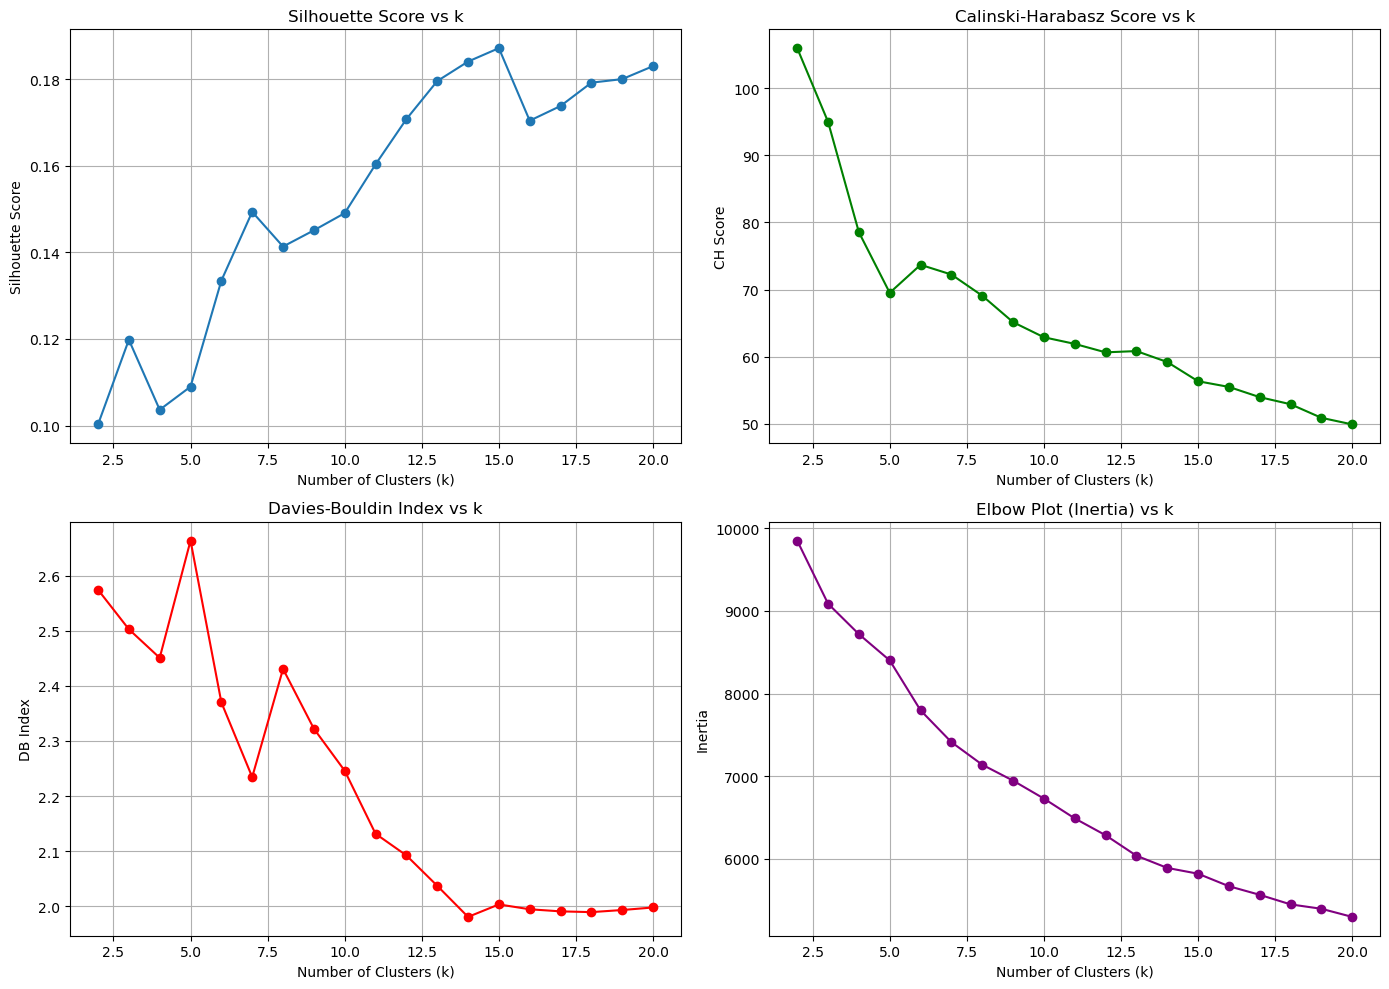

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# function to perform k-means clustering and return labels and inertia
def apply_kmeans(features, num_clusters):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init="auto")
    kmeans_model.fit(features)
    return kmeans_model, kmeans_model.labels_, kmeans_model.inertia_

# function to calculate clustering evaluation scores
def compute_clustering_metrics(features, cluster_labels):
    silhouette_value = silhouette_score(features, cluster_labels)
    ch_score_value = calinski_harabasz_score(features, cluster_labels)
    db_index_value = davies_bouldin_score(features, cluster_labels)
    return silhouette_value, ch_score_value, db_index_value

# main program
if __name__ == "__main__":
    # split the dataset into training and testing sets (ignoring 'output')
    X_train, X_test, y_train, y_test = split_dataset(data)

    # lists to store the results for different k values
    k_values = list(range(2, 21))  # Evaluate for k values from 2 to 20
    silhouette_scores = []
    calinski_scores = []
    davies_indexes = []
    inertia_values = []

    # perform k-means clustering for different values of k
    for k in k_values:
        trained_model, labels, inertia_value = apply_kmeans(X_train, num_clusters=k)
        
        # store inertia (for Elbow Plot)
        inertia_values.append(inertia_value)
        
        # calculate clustering evaluation metrics
        silhouette_value, calinski_value, davies_value = compute_clustering_metrics(X_train, labels)
        
        # store metrics for plotting
        silhouette_scores.append(silhouette_value)
        calinski_scores.append(calinski_value)
        davies_indexes.append(davies_value)

    # plot the metrics against k values
    plt.figure(figsize=(14, 10))

    # silhouette Score Plot
    plt.subplot(2, 2, 1)
    plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
    plt.title("Silhouette Score vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)

    # calinski-Harabasz Score Plot
    plt.subplot(2, 2, 2)
    plt.plot(k_values, calinski_scores, marker='o', label='CH Score', color='green')
    plt.title("Calinski-Harabasz Score vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("CH Score")
    plt.grid(True)

    # davies-Bouldin Index Plot
    plt.subplot(2, 2, 3)
    plt.plot(k_values, davies_indexes, marker='o', label='DB Index', color='red')
    plt.title("Davies-Bouldin Index vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("DB Index")
    plt.grid(True)

    # elbow Plot (Inertia)
    plt.subplot(2, 2, 4)
    plt.plot(k_values, inertia_values, marker='o', label='Inertia', color='purple')
    plt.title("Elbow Plot (Inertia) vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


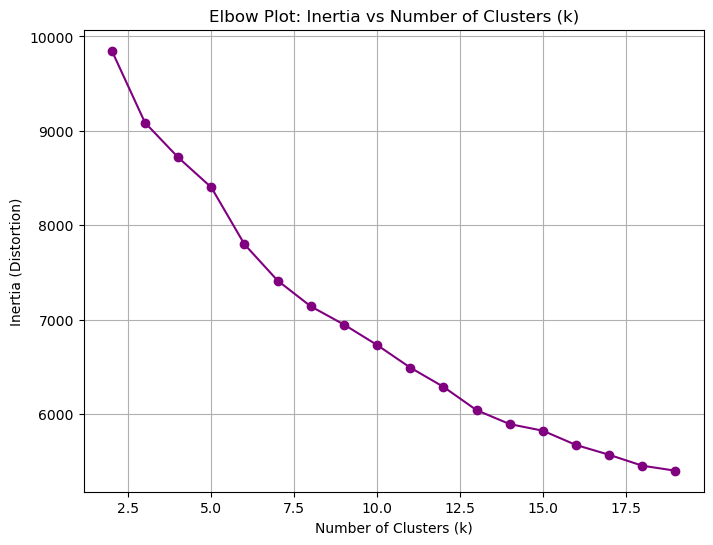

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# function to perform k-means clustering and return the inertia (distortion)
def apply_kmeans_inertia(features, num_clusters):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init="auto")
    kmeans_model.fit(features)
    return kmeans_model.inertia_

# main program
if __name__ == "__main__":
    # split the dataset into training and testing sets (ignoring 'output')
    X_train, X_test, y_train, y_test = split_dataset(data)

    # list to store the inertia values for each value of k
    inertia_values = []
    k_values = list(range(2, 20))  # Evaluate for k values from 2 to 19

    # loop over different values of k and compute inertia (distortion)
    for k in k_values:
        distortion_value = apply_kmeans_inertia(X_train, num_clusters=k)
        inertia_values.append(distortion_value)

    # plot the Elbow Plot (Inertia vs k)
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='purple')
    plt.title("Elbow Plot: Inertia vs Number of Clusters (k)")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Distortion)")
    plt.grid(True)
    plt.show()
